# Ensemble Classifier
It helps improve machine learning by combining various models. This approach allows the production of better predictive performance compared to a single model. The idea is to train a bunch of experts(classifiers) and let them vote.

In [1]:
# Importing libraries
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Voting Ensemble
Lets see an implementation of voting ensemble. Here we use same dataset for different models and then they vote for the outcome.

In [2]:
iris = sns.load_dataset("iris")

In [3]:
species_map = {"setosa": 1, "versicolor": 2, "virginica": 3}
get_species_name = {val: key for key, val in species_map.items()}

In [4]:
iris.species = iris.species.map(species_map)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
new_iris = iris[iris["species"] != 1][["sepal_length", "sepal_width", "species"]]

In [8]:
new_iris.head()

,sepal_length,sepal_width,species
50,7.0,3.2,2
51,6.4,3.2,2
52,6.9,3.1,2
53,5.5,2.3,2
54,6.5,2.8,2


In [9]:
X = new_iris.iloc[:, :-1]
y = new_iris.iloc[:,-1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [12]:
estimators = [("lr", clf1), ("rf", clf2), ("knn", clf3)]

In [13]:
for estimator in estimators:
    val = cross_val_score(estimator[1], X, y, cv=10, scoring="accuracy")
    print(estimator[0], np.round(np.mean(val), 2))

lr 0.75
rf 0.6
knn 0.61


In [14]:
vc = VotingClassifier(estimators=estimators)
val = cross_val_score(vc, X, y, cv=10, scoring="accuracy")
print("VC-hard", np.round(np.mean(val), 2))

VC-hard 0.68


In [15]:
vc1 = VotingClassifier(estimators=estimators, voting="soft")
val = cross_val_score(vc1, X, y, cv=10, scoring="accuracy")
print("VC-soft", np.round(np.mean(val), 2))

VC-soft 0.65


## Bagging(Bootstrapped Aggregation)
It is used to reduce the variance of decision.

<p>
    Implementation steps of Bagging –
    <ul>
        <li>Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.</li>
        <li>A base model is created on each of these subsets.</li>
        <li>Each model is learned in parallel from each training set and independent of each other.</li>
        <li>The final predictions are determined by combining the predictions from all the models.</li>
    </ul>
</p>

In [16]:
new_iris = iris[iris["species"] != 1][["sepal_width", "petal_length", "species"]]

In [17]:
new_iris.head()

,sepal_width,petal_length,species
50,3.2,4.7,2
51,3.2,4.5,2
52,3.1,4.9,2
53,2.3,4.0,2
54,2.8,4.6,2


In [18]:
new_iris = new_iris.sample(100)

In [19]:
iris_train = new_iris.iloc[:60, :].sample(10)
iris_val = new_iris.iloc[60:80, :].sample(5)
iris_test = new_iris.iloc[80:, :].sample(5)

In [20]:
X_test = iris_val.iloc[:, :-1]
y_test = iris_val.iloc[:, -1]

In [21]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_pred, y_test)

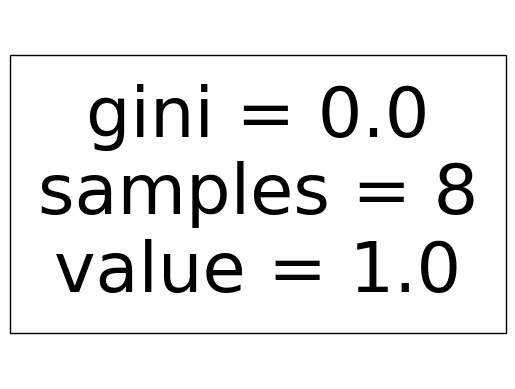

/home/anish/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


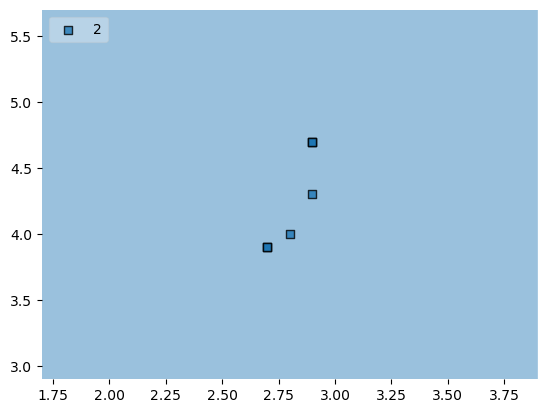

In [22]:
iris_bag = iris_train.sample(8, replace=True)

X = iris_bag.iloc[:, :-1]
y = iris_bag.iloc[:, -1]
iris_bag_1 = DecisionTreeClassifier()
acc_1 = evaluate(iris_bag_1, X, y)

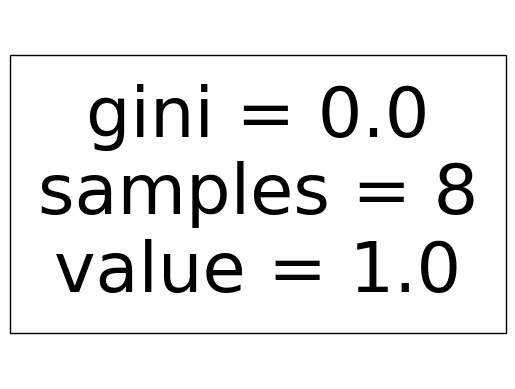

/home/anish/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


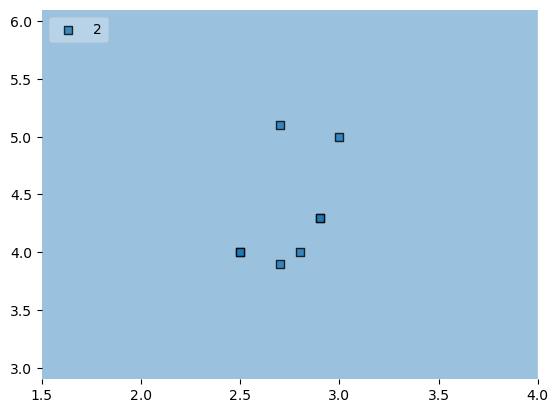

In [23]:
iris_bag = iris_train.sample(8, replace=True)

X = iris_bag.iloc[:, :-1]
y = iris_bag.iloc[:, -1]
iris_bag_2 = DecisionTreeClassifier()
acc_2 = evaluate(iris_bag_2, X, y)

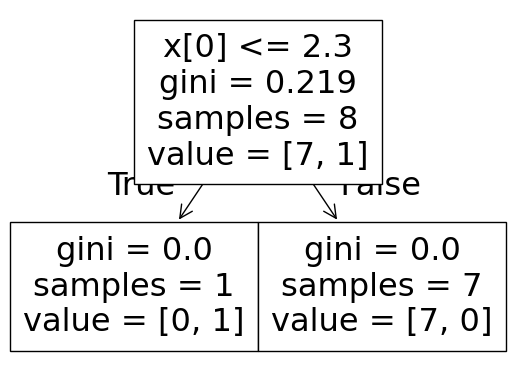

/home/anish/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


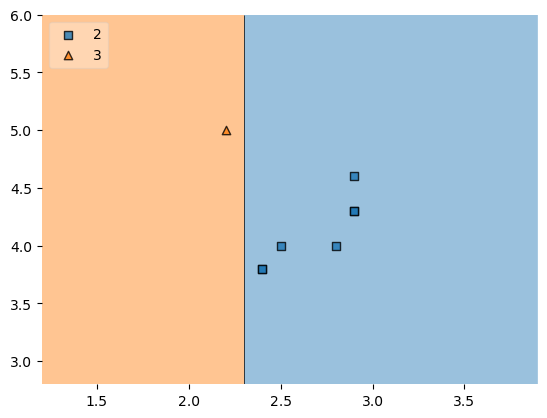

In [24]:
iris_bag = iris_train.sample(8, replace=True)

X = iris_bag.iloc[:, :-1]
y = iris_bag.iloc[:, -1]
iris_bag_3 = DecisionTreeClassifier()
acc_3 = evaluate(iris_bag_3, X, y)

In [25]:
print(acc_1, acc_2, acc_3, sep="\n")

0.4
0.4
0.4


We here have the accuracy score of each of the models, we have to ignore any model whose accuracy is less than 51 then we vote among the rest to find the result.

In [26]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [28]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=25,
    max_samples=0.8,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

In [29]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=25, oob_score=True, random_state=42)

In [30]:
# We will see the oob score of our model
bag.oob_score_

0.9416666666666667

Statistically only 63% percent of data in the dataset are used in this method, so for the rest of the 37% of data, we can use them to test our model.

In [31]:
y_pred = bag.predict(X_test)

In [32]:
accuracy_score(y_pred, y_test)

1.0

We can see the accuracy of our bagging classifier here.

## Boosting Algorithm
Boosting is an ensemble technique that combines multiple weak learners to create a strong learner. The ensemble of weak models are trained in series such that each model that comes next, tries to correct errors of the previous model until the entire training dataset is predicted correctly. One of the most well-known boosting algorithms is AdaBoost (Adaptive Boosting). 

In [33]:
df = pd.DataFrame()

In [34]:
df["x1"] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df["x2"] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df["label"] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [35]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

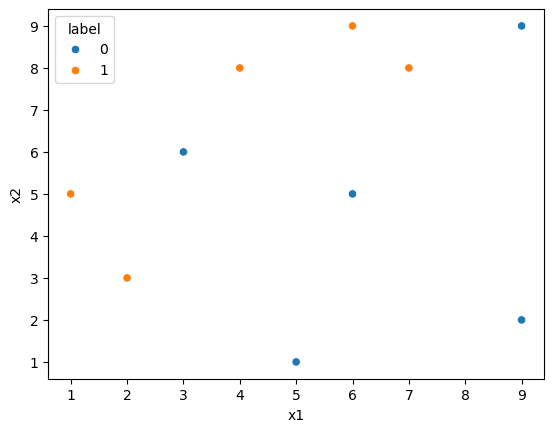

In [36]:
sns.scatterplot(x=df.x1, y=df.x2, hue=df.label)

In [37]:
df["weights"] = 1/df.shape[0]
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [38]:
def calculate_error(error):
    return 0.5 * np.log((1-error) / error)

def update_error_1(row, alpha=0.4236489):
    if row["label"] == row["y_pred"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

def update_error_2(row, alpha=0.2027):
    if row["label"] == row["y_pred"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

def update_error_3(row, alpha=0):
    if row["label"] == row["y_pred"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

def create_new_database(df):
    indices = []
    for _ in range(df.shape[0]):
        a = np.random.random()
        for ind, row in df.iterrows():
            if row["custom_upper"] > a and a > row["custom_lower"]:
                indices.append(ind)

    return indices

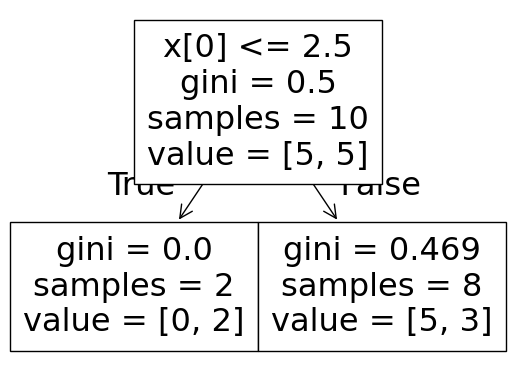

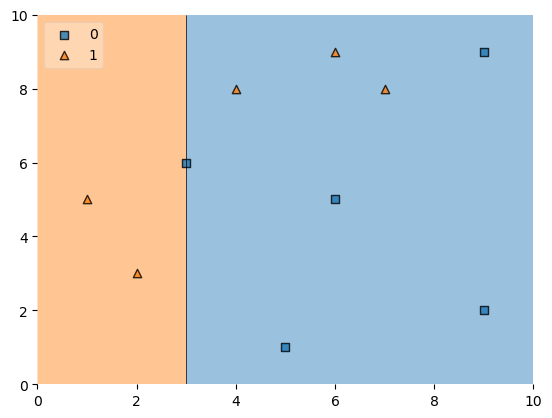

In [39]:
dt1 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values
dt1.fit(X, y)
plot_tree(dt1)
plt.show()
plot_decision_regions(X, y, clf=dt1, legend=2)
df["y_pred"] = dt1.predict(X)
alpha1 = calculate_error(0.3)
df["updated_weights"] = df.apply(update_error_1, axis=1)
df["normalized_weights"] = df["updated_weights"]/df["updated_weights"].sum()
df["custom_upper"] = np.cumsum(df["normalized_weights"])
df["custom_lower"] = df["custom_upper"] - df["normalized_weights"]

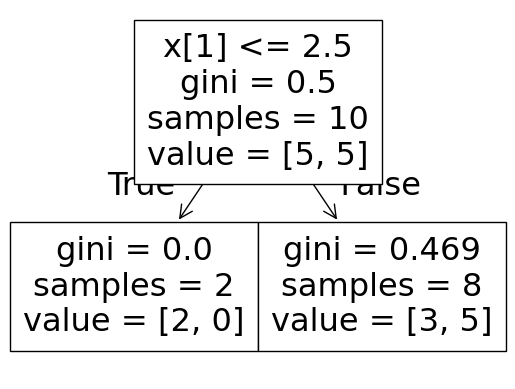

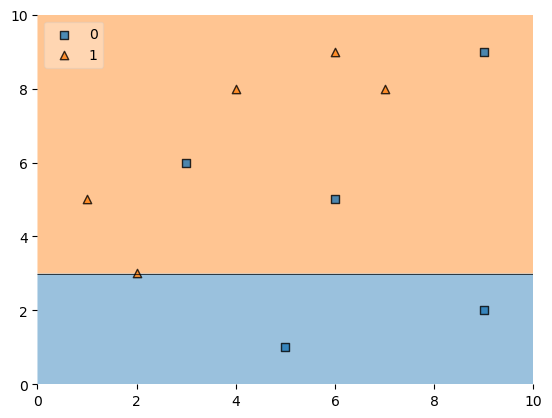

In [40]:
index_values = create_new_database(df)
second_df = df.iloc[index_values, 0:4]
dt2 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values
dt2.fit(X, y)
plot_tree(dt2)
plt.show()
plot_decision_regions(X, y, clf=dt2, legend=2)
second_df["y_pred"] = dt2.predict(X)
alpha2 = calculate_error(0.4)
second_df["updated_weights"] = second_df.apply(update_error_2, axis=1)
second_df["normalized_weights"] = second_df["updated_weights"]/second_df["updated_weights"].sum()
second_df["custom_upper"] = np.cumsum(second_df["normalized_weights"])
second_df["custom_lower"] = second_df["custom_upper"] - second_df["normalized_weights"]

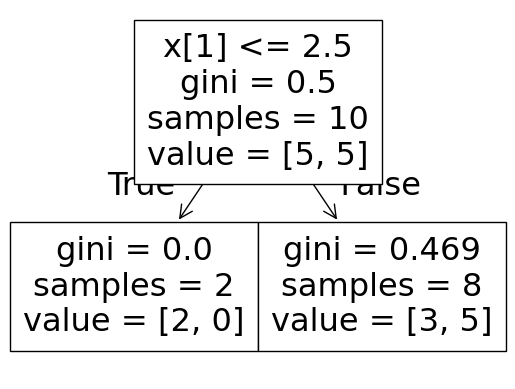

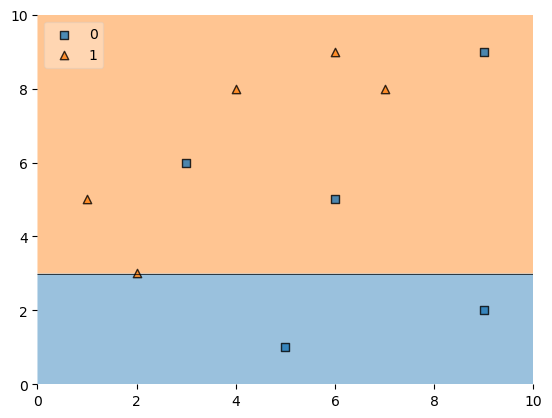

In [41]:
index_values = create_new_database(second_df)
third_df = df.iloc[index_values, 0:4]
dt3 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values
dt3.fit(X, y)
plot_tree(dt3)
plt.show()
plot_decision_regions(X, y, clf=dt3, legend=2)
third_df["y_pred"] = dt3.predict(X)
alpha3 = calculate_error(0.5)
third_df["updated_weights"] = third_df.apply(update_error_3, axis=1)
third_df["normalized_weights"] = third_df["updated_weights"]/third_df["updated_weights"].sum()
third_df["custom_upper"] = np.cumsum(third_df["normalized_weights"])
third_df["custom_lower"] = third_df["custom_upper"] - third_df["normalized_weights"]

Now that we have 3 decision stumps, we will predict the outcome using a formula

In [42]:
query = np.array([1, 5]).reshape(1, 2)
pred1 = dt1.predict(query)
pred2 = dt2.predict(query)
pred3 = dt3.predict(query)
pred1 = 1 if pred1[0] > 0 else -1
pred2 = 1 if pred2[0] > 0 else -1
pred3 = 1 if pred3[0] > 0 else -1
result = alpha1*pred1 + alpha2*pred2 + alpha3*pred3
np.sign(result)

1.0

In [43]:
query = np.array([9, 9]).reshape(1, 2)
pred1 = dt1.predict(query)
pred2 = dt2.predict(query)
pred3 = dt3.predict(query)
pred1 = 1 if pred1[0] > 0 else -1
pred2 = 1 if pred2[0] > 0 else -1
pred3 = 1 if pred3[0] > 0 else -1
result = alpha1*pred1 + alpha2*pred2 + alpha3*pred3
np.sign(result)

-1.0

We can here see the result of boosting with different queries.